In [ ]:
# Before I begin, catalog images with multiple products of different color were removed.
# 1556 catalog images were fed into a darknet object detection neural net througe a unix environment
# sourced darknet from: https://github.com/AlexeyAB/darknet
# sbatch -o out.pillow_realjob -N 1 -n 1 -p gpu -t 07-00:00:00 --qos gpu_access --gres=gpu:1 --wrap 
# "./darknet detector test ./cfg/openimages.data ./cfg/yolov3-openimages.cfg ../weights/yolov3-openimages.weights -thresh 0.05 -ext_output < ../Pillow_select_list > Pillow_select_results.txt"
# detection threshold set to 0.05 to catch as many objects as possible

# Note that the goal is not to accurately detect throw pillow, but to get location of any objects,
# the reason being that the types of background objects in a catalog image are usually limited and expectted.
# For example, here you would expect sofa, chair, window, flower, etc.

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
dir = os.getcwd()
home = os.path.dirname(os.path.dirname(dir)) ## 2 levels up of working directory dir

In [52]:
# import an index file that has the order in which the catalog images are detected on darknet.
pd_index_darknet = pd.read_csv(os.path.join(home, r'Yolov3_pillow/Pillow_select_list'), sep = " ", header = None)
pd_index_darknet.columns = ["image"]
pd_index_darknet["dn_order"] = pd_index_darknet.index.values + 1

t1 = [i[1] for i in pd_index_darknet['image'].apply(os.path.split)]
pd_index_darknet['index_image'] = [os.path.splitext(i)[0] for i in t1]
del t1

In [54]:
print(pd_index_darknet.head())

                          image  dn_order index_image
0  Pillow_select/Page_10_11.jpg         1  Page_10_11
1  Pillow_select/Page_10_12.jpg         2  Page_10_12
2  Pillow_select/Page_10_13.jpg         3  Page_10_13
3  Pillow_select/Page_10_14.jpg         4  Page_10_14
4  Pillow_select/Page_10_15.jpg         5  Page_10_15


In [57]:
# list of darknet output cropped images
# these images named by dn_order (1 per input image), box id (sequential of all detcted objects) and class id & name.
dn_crop = os.listdir(os.path.join(home, r'Yolov3_pillow/result_batch2/result_img'))

In [82]:
# for example, "img_184_379_465_Furniture.jpg.jpg": dn_order = 184, box_order =379, class id #465 for furniture
class_name = [str(os.path.splitext(os.path.splitext(i)[0])[0]).split('_')[-1] for i in dn_crop]
dn_order = [str(os.path.splitext(os.path.splitext(i)[0])[0]).split('_')[1] for i in dn_crop]
box_order = [str(os.path.splitext(os.path.splitext(i)[0])[0]).split('_')[2] for i in dn_crop]
class_id = [str(os.path.splitext(os.path.splitext(i)[0])[0]).split('_')[-2] for i in dn_crop]
crop = pd.DataFrame({"dn_crop": dn_crop,
                    "dn_order": list(map(int,dn_order)),
                    "box_order": list(map(int,box_order)),
                    "class_name": class_name,
                    "class_id": list(map(int,class_id))})
crop.head()

,dn_crop,dn_order,box_order,class_name,class_id
0,img_184_379_465_Furniture.jpg.jpg,184,379,Furniture,465
1,img_146_283_333_Plant.jpg.jpg,146,283,Plant,333
2,img_174_348_432_Clothing.jpg.jpg,174,348,Clothing,432
3,img_24_42_465_Furniture.jpg.jpg,24,42,Furniture,465
4,img_58_107_432_Clothing.jpg.jpg,58,107,Clothing,432


In [ ]:
counter=Counter(crop['class_name'])
test=[list(counter.keys()),list(counter.values())]
pd.DataFrame(np.array(test).T, columns=['class_name','Count'])
plt.hist(crop["class_id"],bins=100)

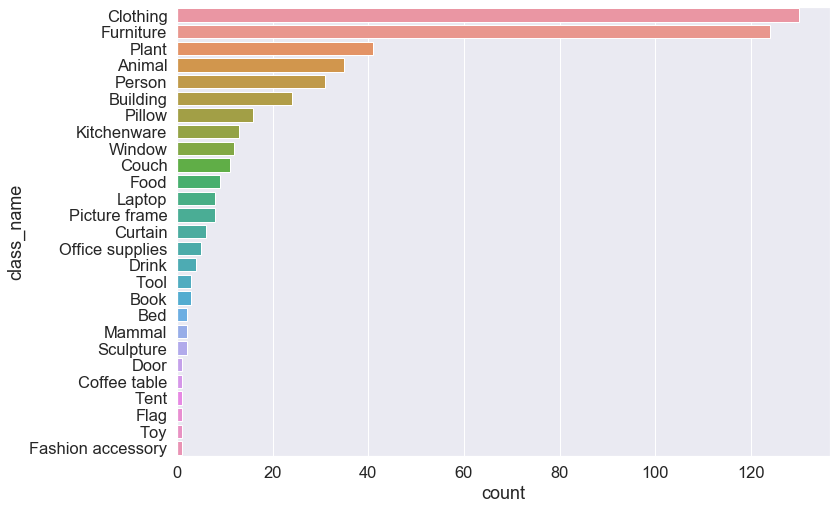

In [117]:
sns.set(font_scale=1)
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("notebook", font_scale=1.5)
ax = sns.countplot(y="class_name", 
                   data=crop,
                   order = crop["class_name"].value_counts().index)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=30)